Social-media-performance-metrics-and-evaluation-of-the-impact-on-brand-building

1. Univariate analysis - Let's look at the behaviour in October. What does the weekday posting trend look like for this month? What percentage of their budget was spent on ads this month? - Inferential statistics - Did they have a higher Total Reach than the month before? 
2. Univariate/bivariate analysis - What about after January? Which type of post was used the most during this month (photo, status, link, video)? Was it also the one with which most customers engaged?
3. Univariate/bivariate/inferential - Pick another industry-relevant month and conduct the same analysis
4. Univariate/bivariate - What month did the customers engage the most with the company's video posts? How did they engage; by comment, like or share?
5. Bivariate - Does the company use paid advertisement for video posts?
6. Inferential - Do you think they should invest on paid advertising for this type of post?
7. Bivariate - What type of posts have people engaged and liked? Is there a particular time of the day when this happens more often?
8. Bivariate - Can you infer a relationship between comments and likes? 


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [25]:
# Load data from the folder where I uploaded the csv file
data = pd.read_csv("/Users/gjg/code/giovjg/datascience/fb_project/csv/dataset_fb_clean.csv")

In [26]:
# visualise the first 5 rows 
data.head()

,page_total_likes,type,category,month,weekday,hour,paid,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_like,lifetime_post_reach_like,lifetime_people_like_engaged,comment,like,share,total_interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [27]:
# identify variables by data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   page_total_likes                 500 non-null    int64  
 1   type                             500 non-null    object 
 2   category                         500 non-null    int64  
 3   month                            500 non-null    int64  
 4   weekday                          500 non-null    int64  
 5   hour                             500 non-null    int64  
 6   paid                             500 non-null    float64
 7   lifetime_post_total_reach        500 non-null    int64  
 8   lifetime_post_total_impressions  500 non-null    int64  
 9   lifetime_engaged_users           500 non-null    int64  
 10  lifetime_post_consumers          500 non-null    int64  
 11  lifetime_post_consumptions       500 non-null    int64  
 12  lifetime_post_impressi

### Univariate analysis - Let's look at the behaviour in October. What does the weekday posting trend look like for this month? 

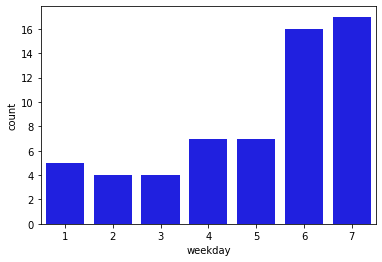

In [28]:
# create condition data from the month of October
condition1 = (data['month']==10)
# print data October
# data[condition1]
# create a subset of the data: days of the week in the month of October
weekdays_10 = data[condition1]['weekday']
# print data
# weekdays_10
# count of posts by day of the week for the month of October
_=sns.countplot(weekdays_10, color='b')

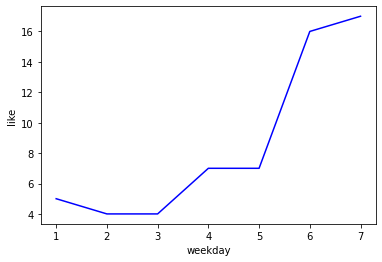

In [29]:
# When trends are required is better to actually show a line plot
condition1 = (data['month']==10)
selection = data[condition1]
selection_agg = selection[['weekday','like']].groupby(['weekday'], as_index=False).count()
_=sns.lineplot(x='weekday', y='like', data=selection_agg, color='b')

###  What percentage of the post were paid on ads this month? 

In [30]:
condition1 = (data['month']==10)
condition2 = (data['paid']==1)
paid = data[condition1 & condition2]
unpaid = data[condition1 & ~condition2]
print("The percentage of posts paid in October were: {}%".format((len(paid)/(len(paid)+len(unpaid))*100)))

The percentage of posts paid in October were: 20.0%


### Did they have a higher Total Reach than the month before?

In [16]:
condition1 = (data['month']==10)
condition2 = (data['month']==9)
reach_october = data[condition1]['lifetime_post_total_reach']
reach_september = data[condition2]['lifetime_post_total_reach']

# T-test on the difference
t, pvalue = stats.ttest_ind(reach_october, reach_september)
print("The difference between the two months means is {:.1f}".format(reach_october.mean() - reach_september.mean()))
print("p-value: {:.2f}".format(pvalue))

The difference between the two months means is 2015.1
p-value: 0.51


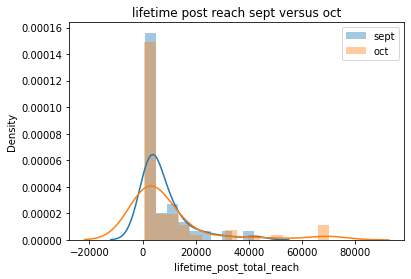

In [17]:
# Plot the two distributions using an histogramme 
#(seaborn) and visualize if there is an obvious difference between the 2 distributions
_=sns.distplot(reach_september, label='sept')
_=sns.distplot(reach_october, label='oct')
_=plt.title("lifetime post reach sept versus oct")
_=plt.legend()

In [33]:
# the difference is not significant

### What about after January? Which type of post was used the most during this month (photo, status, link, video)?

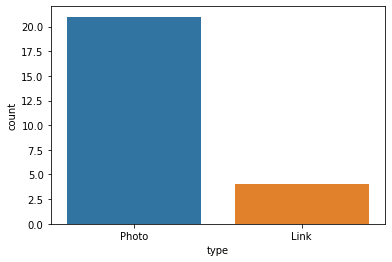

In [18]:
condition1 = (data['month']==1)
type_january = data[condition1]['type']
_=sns.countplot(type_january)

### Was it also the one with which most customers engaged?

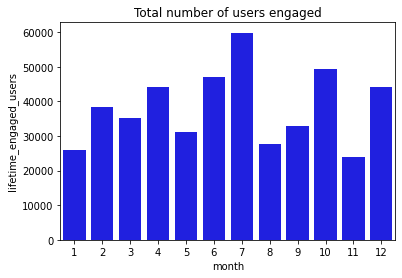

In [19]:
selection_total = data[['month','lifetime_engaged_users']].groupby(['month'], as_index=False).sum()
_=sns.barplot(x='month', y='lifetime_engaged_users', data=selection_total, color='b')
_=plt.title("Total number of users engaged")

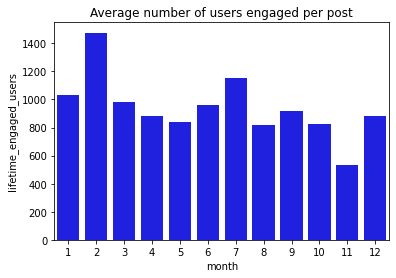

In [20]:
selection_avg = data[['month','lifetime_engaged_users']].groupby(['month'], as_index=False).mean()
_=sns.barplot(x='month', y='lifetime_engaged_users', data=selection_avg, color='b')
_=plt.title("Average number of users engaged per post")

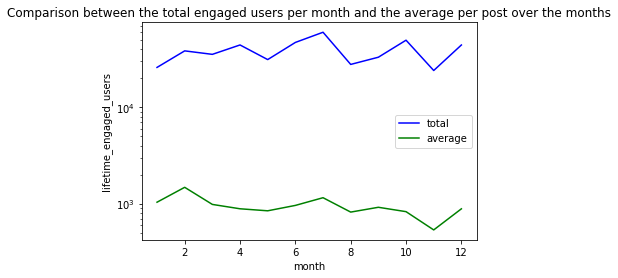

In [21]:
ax1 = sns.lineplot(x='month', y='lifetime_engaged_users', data=selection_total, color='b', label='total')
ax2 = sns.lineplot(x='month', y='lifetime_engaged_users', data=selection_avg, color='g', label='average')
ax1.set_yscale('log')
ax2.set_yscale('log')
_=plt.title("Comparison between the total engaged users per month and the average per post over the months")
_=plt.legend()

In [37]:
### January is not the month with the most total number of engaged users the highest average number of engaged users per post.

### Pick another industry-relevant month and conduct the same analysis

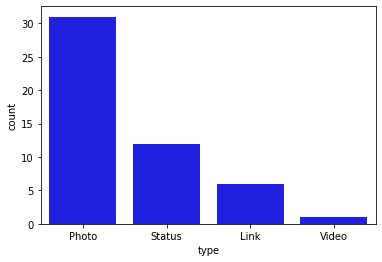

In [38]:
condition1 = (data['month']==12)
type_january = data[condition1]['type']
_=sns.countplot(type_january, color='b')

### What month did the customers engage the most with the company's video posts? How did they engage; by comment, like or share?

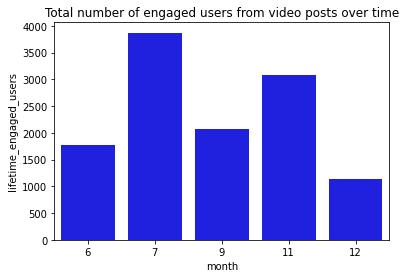

In [40]:
condition1 = (data['type']=='Video')
video_month = data[condition1][['month','lifetime_engaged_users']]
engage_month_total = video_month.groupby(['month'], as_index=False).sum()
_=sns.barplot(x='month', y='lifetime_engaged_users', data=engage_month_total, color='b')
_=plt.title("Total number of engaged users from video posts over time")

### Does the company use paid advertisement for video posts?

In [41]:
condition1 = (data['type']=='Video')
condition2 = (data['paid']==1)
video_paid = data[condition1 & condition2]
video = data[condition1]
print("There are {} videos paid regarding the total of {} video posts".format(len(video_paid), len(video))) 

There are 4 videos paid regarding the total of 7 video posts


### Do you think they should invest on paid advertising for this type of post?

In [43]:
condition1 = (data['type']=='Video')
condition2 = (data['paid']==1)
paid_videoposts = data[condition1 & condition2]['lifetime_engaged_users']
non_paid_videoposts = data[condition1 & ~condition2]['lifetime_engaged_users']

# T-test to see if there is a significant difference
t, pvalue = stats.ttest_ind(paid_videoposts, non_paid_videoposts)
print("The difference between the two months means is {:.1f}".format(paid_videoposts.mean() - non_paid_videoposts.mean()))
print("p-value: {}".format(pvalue))

The difference between the two months means is 434.6
p-value: 0.6708408709047018


In [44]:
# There is not a significant difference because the sample size is too small to extract significant conclusions.

### What type of posts have people engaged and liked? Is there a particular time of the day when this happens more often?

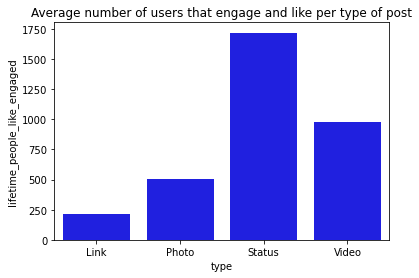

In [45]:
engage_like_type = data[['type','lifetime_people_like_engaged']].groupby(['type'], as_index=False).mean()
_=sns.barplot(x='type', y='lifetime_people_like_engaged', data=engage_like_type, color='b')
_=plt.title("Average number of users that engage and like per type of post")

In [47]:
# The type of post that engaged the most people was status

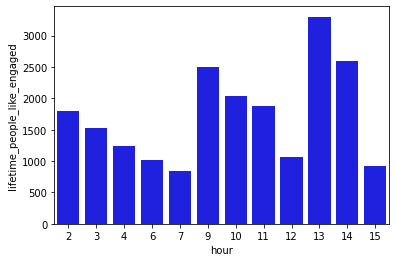

In [48]:
condition1 = (data['type']=='Status')
engage_like_type = data[condition1][['hour','lifetime_people_like_engaged']].groupby(['hour'], as_index=False).mean()
_=sns.barplot(x='hour', y='lifetime_people_like_engaged', data=engage_like_type, color='b')

In [49]:
# People seem to engage and like most status posts in the morning and at lunch time.

### Can you infer a relationship between comments and likes? over time (months or over a day, over a week), visualize their variability of engagement.

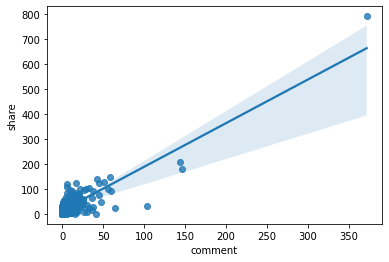

In [57]:
_=sns.regplot(data['comment'], data['share'])

In [51]:
# both are correlated

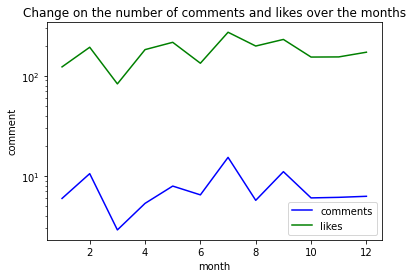

In [52]:
comment_month = data[['month','comment']].groupby(['month'], as_index=False).mean()
ax1=sns.lineplot(x='month', y='comment', data=comment_month, color='b', label='comments')
likes_month = data[['month','like']].groupby(['month'], as_index=False).mean()
ax2=sns.lineplot(x='month', y='like', data=likes_month, color='g', label='likes')
_=plt.title("Change on the number of comments and likes over the months")
ax1.set_yscale('log')
ax2.set_yscale('log')
_=plt.legend()

In [55]:
# the behaviour of comments and likes are similar over time (months)

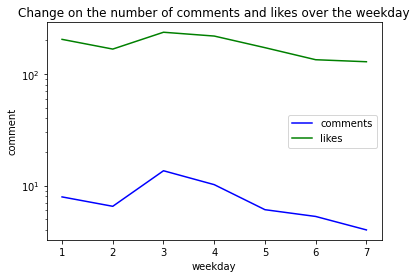

In [54]:
comment_weekday = data[['weekday','comment']].groupby(['weekday'], as_index=False).mean()
ax1=sns.lineplot(x='weekday', y='comment', data=comment_weekday, color='b', label='comments')
likes_weekday = data[['weekday','like']].groupby(['weekday'], as_index=False).mean()
ax2=sns.lineplot(x='weekday', y='like', data=likes_weekday, color='g', label='likes')
_=plt.title("Change on the number of comments and likes over the weekday")
ax1.set_yscale('log')
ax2.set_yscale('log')
_=plt.legend()

In [ ]:
# the behaviour of comments and likes are similar over time (weekday)

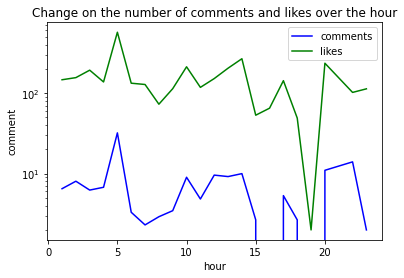

In [56]:
comment_hour = data[['hour','comment']].groupby(['hour'], as_index=False).mean()
ax1=sns.lineplot(x='hour', y='comment', data=comment_hour, color='b', label='comments')
likes_hour = data[['hour','like']].groupby(['hour'], as_index=False).mean()
ax2=sns.lineplot(x='hour', y='like', data=likes_hour, color='g', label='likes')
_=plt.title("Change on the number of comments and likes over the hour")
ax1.set_yscale('log')
ax2.set_yscale('log')
_=plt.legend()